<h1 id="tocheading">Table of Contents</h1>
<br />
<div id="toc"></div>
<div id="toc"><ul class="toc"><li><a href="#1.-Introduction">1. Introduction</a><a class="anchor-link" href="#1.-Introduction">¶</a></li><li><a href="#2.-Analysis-of-matrix-search-methods">2. Analysis of matrix search methods</a><a class="anchor-link" href="#2.-Analysis-of-matrix-search-methods">¶</a></li><ul class="toc"><li><a href="#2.1.-Time-complexity-analysis">2.1. Time complexity analysis</a><a class="anchor-link" href="#2.1.-Time-complexity-analysis">¶</a></li><ul class="toc"><li><a href="#2.1.1.-What-is-time-complexity?">2.1.1. What is time complexity?</a><a class="anchor-link" href="#2.1.1.-What-is-time-complexity?">¶</a></li><li><a href="#2.1.2.-Time-complexities-of-matrix-search-algorithms">2.1.2. Time complexities of matrix search algorithms</a><a class="anchor-link" href="#2.1.2.-Time-complexities-of-matrix-search-algorithms">¶</a></li><li><a href="#2.1.3.-Time-complexities-of-data-structures">2.1.3. Time complexities of data structures</a><a class="anchor-link" href="#2.1.3.-Time-complexities-of-data-structures">¶</a></li></ul><li><a href="#2.2.-Measuring-search-durations-using-different-data-structures">2.2. Measuring search durations using different data structures</a><a class="anchor-link" href="#2.2.-Measuring-search-durations-using-different-data-structures">¶</a></li><ul class="toc"><li><a href="#2.2.1.-Search">2.2.1. Search</a><a class="anchor-link" href="#2.2.1.-Search">¶</a></li><ul class="toc"><li><a href="#2.2.1.1.-Linear-search">2.2.1.1. Linear search</a><a class="anchor-link" href="#2.2.1.1.-Linear-search">¶</a></li><li><a href="#2.2.1.2.-Binary-search">2.2.1.2. Binary search</a><a class="anchor-link" href="#2.2.1.2.-Binary-search">¶</a></li><li><a href="#2.2.1.3.-Visualise-the-speed-advantage-of-binary-searches-versus-linear-searches">2.2.1.3. Visualise the speed advantage of binary searches versus linear searches</a><a class="anchor-link" href="#2.2.1.3.-Visualise-the-speed-advantage-of-binary-searches-versus-linear-searches">¶</a></li></ul></ul></ul><li><a href="#3.-Summary">3. Summary</a><a class="anchor-link" href="#3.-Summary">¶</a></li><li><a href="#4.-Limitations">4. Limitations</a><a class="anchor-link" href="#4.-Limitations">¶</a></li><ul class="toc"><li><a href="#4.1.-Lack-of-space-efficiency-check">4.1. Lack of space efficiency check</a><a class="anchor-link" href="#4.1.-Lack-of-space-efficiency-check">¶</a></li><li><a href="#4.2.-Impurity-in-search-functions-used-in-this-project">4.2. Impurity in search functions used in this project</a><a class="anchor-link" href="#4.2.-Impurity-in-search-functions-used-in-this-project">¶</a></li><li><a href="#4.3.-Time-measurement-vs-Time-complexity">4.3. Time measurement vs Time complexity</a><a class="anchor-link" href="#4.3.-Time-measurement-vs-Time-complexity">¶</a></li></ul></ul></div>

# 1. Introduction

Searching for a value in a 1-dimensional array can be done in linear time by checking every element in the array. If, however, the array has been sorted, the search can be done in logarithmic time (which is much faster than linear time) using binary search.

Searching inside a matrix (2-dimensional array), which is essentially an array of arrays, is a similar problem, but takes a bit more work.

In this project, I will do the following.

1. Discuss the time complexities of matrix* searches in which a row containing a specified value will be retrieved.
2. Measure the search durations using three different data types (Python's [list](https://docs.python.org/3/tutorial/introduction.html#lists), [ndarray](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.html) (of numpy) and [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) (of pandas).

\**I will refer to a 2-dimensional array as a matrix regardless of the data type.*


# 2. Analysis of matrix search methods

## 2.1. Time complexity analysis

### 2.1.1. What is time complexity?
Time complexity refers to how fast an algorithm can run, measured as the number of steps to be taken by the algorithm. Often the worst-case scenario is considered (e.g. searching for the last element in an array), which can produce a guaranteed maximum running time.

Time complexity is one of several measures of [algorithmic efficiency](https://en.wikipedia.org/wiki/Algorithmic_efficiency). Another common measure is the space compexity (amount of required memory to run the algorithm). However, these other measures will not be discussed here because they are outside the scope of this project.


### 2.1.2. Time complexities of matrix search algorithms

The following table shows the time complexities of linear and binary searches. 

* `m`: Number of columns
* `n`: Number of rows

|&nbsp;|Time complexity|
|---|---|
|Linear search in the whole matrix (unsorted columns)|**O(m * n)**<br />(= Linear time)|
|Binary search per column (sorted columns)|**O(m log n)**<br />(> Logarithmic time)|

As with the 1-dimensional arrays, an unsorted matrix can be searched only in linear time.



A matrix search can be done in logarithmic time as well if the matrix is converted into a sorted 1-dimensional array first. For this new array, the original locations of each element in the matrix should be noted.

However, this project will be about searching the matrix as it is. If each column\*\* has been sorted\*, the search can still be faster than linear time. However, as shown in the table, it will be slower than logarithmic time because a binary search has to be done per column\*\* (i.e. repeatedly rather than at one go).

\*\**Sorting and binary searching can be done in terms of rows. However, the table above reflects sorting and searching within columns, which is also what I will do in this project.*

\*\*\**Sorting a matrix by all columns is not possible. So, I will first separate each column, note its elements' original row IDs, and then sort the column. When the binary search finds an element, the original row ID will be used to retrieve the corresponding row.*

### 2.1.3. Time complexities of data structures

I will use three different data structures, among various ones provided by Python and its libraries.

Each data structure diplays different time complexities for the same operation. For example, `3 in {1, 2, 3}` (set) is usually faster than `3 in [1, 2, 3]` (list) - see https://wiki.python.org/moin/TimeComplexity for more.

Therefore, in a more thorough study, the time complexity analysis would consider the **time complexities of both the algorithm and each data structure**.

However, I do not have sufficient knowledge to calculate time complexities per data structure. For a less robust alternative, see the next section.


## 2.2. Measuring search durations using different data structures

I will measure the running time using each data structure in the next section.

* list
* DataFrame (which is faster than a [dictionary](https://stackoverflow.com/a/22084742/7194743))
* ndarray (which is faster than a [list](https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference) or [DataFrame](https://stackoverflow.com/a/27889133/7194743))

To be able to begin the analysis, I will carry out a 3-step preparation.

First, libraries will be loaded and display setting will be adjusted.

In [1]:
from collections import OrderedDict
from IPython.display import display
import math
from pprint import pprint
from time import process_time

import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Allow 10 decimal places to be displayed for floats
pd.set_option('display.precision', 10)

Second, some functions will be created.

In [2]:
def binary_search_columns(matrix, target, col_vals, row_inds):
    """
    target: Value to find
    matrix: Data in the format of list of lists, ndarray of ndarrays or DataFrame
    col_vals: One sorted column from matrix in the format of list, ndarray or Series (of pandas)
    row_inds: Original (i.e. before being sorted) indexes of column.
    
    Find target in col_vals using binary search.
    If target is found, return matrix's row at the target's original index.
    """
    
    # Set bounds
    lo = 0
    hi = len(col_vals) - 1
    
    # Get index and value of middle element
    ind = get_average(lo, hi)
    val = get_value_from_column(ind, col_vals)
    
    # Binary search until target is found or column is exhausted
    target_row = []
    while hi > lo:
        
        # Adjust search range
        if target < val:
            hi = ind - 1
        else:
            lo = ind + 1
        
        # Get index and value of middle element
        ind = get_average(lo, hi)
        val = get_value_from_column(ind, col_vals)

        # If target is found
        if target == val:
            
            # Get row of matrix that corresponds to the index when the col_vals is a ...
            # 1. list or ndarray
            if row_inds is not None:
                matrix_ind = row_inds[ind]
                target_row = matrix[matrix_ind]
            
            # 2. Series ((of pandas) contains indexes which is equivalent to row_inds)
            else:
                matrix_ind = col_vals.index[ind]
                target_row = matrix.loc[matrix_ind]
    
    return target_row

def binary_search_matrix(matrix, target, col_vals_list, row_inds_list):
    """
    col_vals_list: Sorted columns extracted from matrix.
    row_inds_list: List of original row indexes for each sorted column.
    
    Does binary search in matrix of dtype to find target.
    Returns the row in matrix containing target and
    time taken for the search.
    """
    
    # Initialise time measurement
    duration = 0
    
    # Get number of columns in matrix
    num_cols = len(col_vals_list)

    # For each column
    for column_index in range(num_cols):
        
        # Get column values and row indexes
        col_vals = col_vals_list[column_index]
        row_inds = row_inds_list[column_index]

        # Start measuring time
        start = process_time()

        # Carry out search
        target_row = binary_search_columns(matrix, target, col_vals, row_inds)

        if len(target_row) > 0:
            break

        # Finish measuring time
        end = process_time()
        duration = end - start
        
    return target_row, duration

def display_outout(target_rows_dict, durations_mean, params):
    """
    Outputs are passed from search_and_return_output function
    and displayed as text, table(s) and a plot.
    """
    
    lines_pad = "\n\n\n"
    
    for param in params:
        print(param[0] + ":")
        print(param[1])
        print(lines_pad)
    
    # Display retrieved row
    print("Retrieved row per set of matrix dimensions:")
    for dims_label in target_rows_dict:
        target_row_df = pd.DataFrame(target_rows_dict[dims_label]["DataFrame"]).T
        target_row_df.index = [dims_label]
        display(target_row_df)
    print(lines_pad)

    # Draw plot of durations_mean
    print("Search durations in seconds (plot):")
    plot_search_durations(durations_mean, "Duration of search")
    print(lines_pad)

    # Display durations_mean as a table
    print("Search durations in seconds (table):")
    display(durations_mean.astype(float))

def generate_matrix(dims, dtype):
    """
    dims: A tuple containing numbers of rows and columns
    dtype: Data type of matrix ("list", "ndarray" or "DataFrame")
    
    Returns a matrix of integers starting from 0,
    with dimension dims[0] x dims[1]
    (i.e. (number of rows) x (number of columns))
    per data type.
    """
    
    num_rows = dims[0]

    # Define dimensions
    dim = dims[0] * dims[1]

    # Create matrix as a list of list
    matrix_list = []
    row = []
    for i in range(dim):
        row.append(i)
        if i % num_rows == num_rows - 1:
            matrix_list.append(row)
            row = []
    
    # Prepare output in specified data format
    if dtype == "list":
        matrix = matrix_list
    
    elif dtype == "ndarray":
        matrix = np.array(matrix_list)
    
    elif dtype == "DataFrame":
        matrix = pd.DataFrame(matrix_list)
    
    return matrix

def get_average(lo, hi):
    """
    Returns average value of lo and hi.
    """
    return math.floor((lo + hi) / 2)

def get_column(matrix, dtype, column_index):
    """
    dtype: Data type of matrix
    Return column at column_index of matrix.
    """

    # Extract column when matrix is a ...
    # 1. list
    if dtype == "list":
        col = [i[column_index] for i in matrix]
        
    # 2. ndarray
    elif dtype == "ndarray":
        col = matrix[:,column_index]
        
    # 3. pandas DataFrame
    elif dtype == "DataFrame":
        col = matrix.iloc[:,column_index]

    return col

def get_colVals_rowInds_and_sort(col):
    """
    col: A column in matrix.
    
    Sort column, noting each element's original index.
    Return outputs.
    """
    # 1. When col is a list or ndarray
    if type(col) in [list, np.ndarray]:

        # Get row indexes and values of column
        row_inds_vals = [[ind, val] for [ind, val] in enumerate(col)]

        # Sort column
        row_inds_vals.sort(key = lambda x: x[1])

        # Separate indexes and values
        # 1.1. list
        if type(col) == list:
            row_inds, col_vals = map(list, zip(*row_inds_vals))

        # 1.2. ndarray
        elif type(col) == np.ndarray:
            row_inds, col_vals = map(np.array, zip(*row_inds_vals))

            # Ensure indexes are integers
            row_inds = row_inds.astype(int)
    
    # 2. When col is a pandas DataFrame
    elif type(col) == pd.core.frame.Series:
        
        # Sort column
        col = col.sort_values()

        # Get indexes and values of column
        row_inds = None # indexes are already included in col
        col_vals = col    

    return col_vals, row_inds

def get_data_types(data_list):
    """
    Returns data type of each element in data_list.
    """
    
    return [type(data).__name__ for data in data_list]

def get_matrix_max(matrix, dtype):
    """
    dtype: Data type of matrix ("list", "ndarray" or "DataFrame")
    
    Returns maximum value matrix.
    """
    
    if dtype == "list":
        matrix_max = np.array(matrix).max()
    
    elif dtype == "ndarray":
        matrix_max = matrix.max()
    
    elif dtype == "DataFrame":
        matrix_max = matrix.values.max()
    
    return matrix_max

def get_number_of_cols(matrix, dtype):
    """
    Returns the number of columns in matrix.
    """
    
    # 1. list
    if dtype == "list":
        num_cols = len(matrix[0])

    # 2. ndarray or DataFrame
    elif dtype in ["ndarray", "DataFrame"]:
        num_cols = matrix.shape[1]

    return num_cols

def get_value_from_column(ind, col_vals):
    """
    ind: Index
    col_vals: One sorted column from matrix in the format of list, ndarray or Series (of pandas)
    
    Return value at ind in col_vals.    
    """
    
    # 1. list or ndarray
    if type(col_vals) in [list, np.ndarray]:
        val = col_vals[ind]

    # 2. pandas DataFrame
    elif type(col_vals) == pd.core.frame.Series:
        val = col_vals.iloc[ind]

    return val
    
def linear_search_matrix(matrix, dtype, target):
    """
    Does linear search in matrix of dtype to find target.
    Returns the row in matrix containing target and
    time taken for the search.
    """
    
    # Start measuring time
    start = process_time()
    
    target_row = []
    
    # Get row containing the target when matrix is a ...
    # 1. list
    if dtype == "list":
        for row in matrix:
            for val in row:
                if target == val:
                    target_row = row
                    break
            if len(target_row) > 0:
                break
    
    # 2. ndarray
    elif dtype == "ndarray":
        target_row = matrix[np.where(matrix == target)[0]]
    
    # 3. pandas DataFrame
    elif dtype == "DataFrame":
        try:
            target_row = matrix.iloc[np.where(matrix == target)[0][0]]
        except:
            pass
    
    # Finish measuring time
    end = process_time()
    duration = end - start
    
    return target_row, duration
    
def matrix_to_sorted_columns_and_inds(matrix, dtype):
    """
    Extract columns and row indexes from matrix of dtype.
    Returns sorted columns and row indexes are rearranged accordingly.
    """
    
    # Number of columns in matrix
    num_cols = get_number_of_cols(matrix, dtype)
    
    # Initialise list of sorted columns
    col_vals_list = []
    
    # Original row indexes of matrix.
    # These indexes will lead each value in
    # sorted column back to the original row in matrix.
    row_inds_list = []
    
    # For each column
    for column_index in range(num_cols):
        
        # Sort column with original row indexes noted
        col_vals, row_inds = prepare_columns(matrix, dtype, column_index)
        
        # Collect output
        row_inds_list.append(row_inds)
        col_vals_list.append(col_vals)
    
    return col_vals_list, row_inds_list

def plot_search_durations(df, ylabel):
    """
    df: pandas DataFrame containing search durations
    
    Draw bar plot with df.
    X axis represents dimensions sets of matrices (from row indexes).
    For each dimensions set, there are as many bars
    as the number of data types (from column indexes).
    """
    
    # Parameters for plot
    width = 0.2
    colors = ["b", "r", "g"]

    # Number of bars (= number of rows in df)
    num_bars = df.shape[1]

    # Initialise figure and axes
    fig, ax = plt.subplots(figsize=(10, 10))

    # x (= number of matrices = number of columns in df)
    num_xticks = df.shape[0]
    x_init = np.arange(num_xticks)
    x = x_init

    # For each column (matrix) in df
    for i in range(num_bars):

        # Add bars (data types)
        ax.bar(x, df.iloc[:,i], width, color=colors[i])
        
        # Set position for next set of bars
        x = x + width

    plt.xlabel("Dimension of matrix")
    plt.ylabel(ylabel)

    plt.xticks((x_init + (x - width)) / 2, df.index)
    plt.xticks(rotation="horizontal")

    plt.legend(df.columns, loc="best")
    
    plt.show()

def prepare_columns(matrix, dtype, column_index):
    """
    dtype: Data type of matrix
    Get column at column_index of matrix.
    Then, sort column, noting each element's original index.
    
    Return outputs.
    """
    
    # Extract column from matrix
    col = get_column(matrix, dtype, column_index)
        
    # Get indexes and values of column, then sort by values
    col_vals, row_inds = get_colVals_rowInds_and_sort(col)
    
    return col_vals, row_inds

def search_and_return_output(dtypes, dims, num_dims_sets, dims_inc_factor, algorithm, num_iterations):
    """
    dtypes: Data types of matrices.
    dims: A tuple containing numbers of rows and columns
    num_dims_sets: Number of dims variations
    dims_inc_factor: If num_dims_sets > 1, each subsequent dims will be dims * dims_inc_factor
    algorithm: Search strategy. Either "linear" or "binary".
    num_iterations: Number of trials. Average durations taken across trials.
    
    Matrices will be created with all possible combinations of dims and dtypes.
    
    Either linear or binary search will be done to find the last element in the matrix.
    For linear search, matrix is searched as it is.
    For binary search, columns are extracted from matrix, and each sorted columns is searched.
    
    Returns matrix's row containing target, search durations and some input parameters to this function.
    Outputs are passed to display_outout fundtion.
    """
    
    dims = np.array(dims)

    # Initialize search durations tracker
    durations_sum = pd.DataFrame(columns=dtypes)
    
    # Initialise results tracker
    target_rows_dict = {}

    # For each set of dimensions
    for i in range(num_dims_sets):
        
        # Create string representation of this dimensions set
        dims_label = "{} x {}".format(dims[0], dims[1])
        
        # Add row (for this dimensions set) to search durations tracker
        durations_sum.loc[dims_label] = [0] * len(dtypes)
        
        # For each data type
        for dtype in dtypes:
            
            # Create matrix
            matrix = generate_matrix(dims, dtype)

            # Get max value in matrix
            matrix_max = get_matrix_max(matrix, dtype)
            
            # Add key (for this dimensions set) to results tracker
            target_rows_dict[dims_label] = {dtype: None}
            
            # If binary search, extract sorted columns and original row indexes
            # for each value in column
            if algorithm == "binary":
                col_vals_list, row_inds_list = matrix_to_sorted_columns_and_inds(matrix, dtype)

            # Do this num_iterations times
            for iteration in range(num_iterations):

                # Carry out linear search and measure duration
                if algorithm == "linear":
                    target_row, duration = linear_search_matrix(matrix, dtype, matrix_max)

                # Or xarry out binary search and measure duration
                elif algorithm == "binary":
                    target_row, duration = binary_search_matrix(matrix, matrix_max, col_vals_list, row_inds_list)

                # Sum search duration
                durations_sum.loc[dims_label, dtype] += duration
        
            # Get mean duration
            durations_mean = durations_sum / num_iterations
            
            # Record retrieved row
            target_rows_dict[dims_label][dtype] = target_row
    
        # Increase dimensions
        dims *= dims_inc_factor
        
        # Collect parameters
        params = (
                    ("Search algorithm", algorithm),
                    ("Data types of matrices", dtypes),
                    ("Number of iterations", num_iterations)
                 )

    return target_rows_dict, durations_mean, params

Lastly, parameters will be set so that matrices will be created in 3 different dimensions: 10 x 10, 100 x 100, 1000 x 1000. Matrices with each dimension will be made in all three types of data structures. Therefore, there will be a total of 9 matrices.

Also, each matrix will be searched 1000 times for the same target value. A mean search duration for each matrix will be calculated and displayed.

In [3]:
# Dimensions
dims = (10, 10)

# Number of dimensions variations
num_dims_sets = 3

# If num_dims_sets > 1, each subsequent dims will be dims * dims_inc_factor
dims_inc_factor = 10

# List of data types (list, ndarray, DataFrame)
dtypes = get_data_types([[], np.array([]), pd.DataFrame()])

# Number of times to run searches
num_iterations = 1000

### 2.2.1. Search

The target value to search for is the maximum value in the matrix. This is so that the worst-case scenario is simulated.

* Outputs of importance: `Search durations in seconds` as a plot and table
    
    These are the measurements this section is for: mean duration of matrix search for each dimensions set and each data type. 
    
    These durations may be longer than expected when the matrix size is small. This is because the search functions (`linear_search_matrix` and especially `binary_search_matrix`) contains additional steps in addition to the pure steps of search algorithms. These are supplementary steps to enable the searches (e.g. accessing values in column/matrix using index, calculating middle value for binary searches, checking data types). Also, they may or may not be independent of the input sizes (i.e. matrix sizes) - unfortunately this is beyond my knowledge.
    
    
* Output of less importance: `Total duration of assessment in seconds`

    This is the first output to be displayed. It is the time taken for the whole implementation by `search_and_return_output` function. This function wraps everything from the search functions (`linear_search_matrix` and especially `binary_search_matrix`) to various other processes which helps run the search functions. Examples of other processes include creating matrices, extracting and sorting columns and measuring time of each matrix search.

#### 2.2.1.1. Linear search

Total duration of assessment in seconds:
841.789837696




Search algorithm:
linear




Data types of matrices:
['list', 'ndarray', 'DataFrame']




Number of iterations:
1000




Retrieved row per set of matrix dimensions:


,0,1,2,3,4,5,6,7,8,9
10 x 10,90,91,92,93,94,95,96,97,98,99


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
100 x 100,9900,9901,9902,9903,9904,9905,9906,9907,9908,9909,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1000 x 1000,999000,999001,999002,999003,999004,999005,999006,999007,999008,999009,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999






Search durations in seconds (plot):


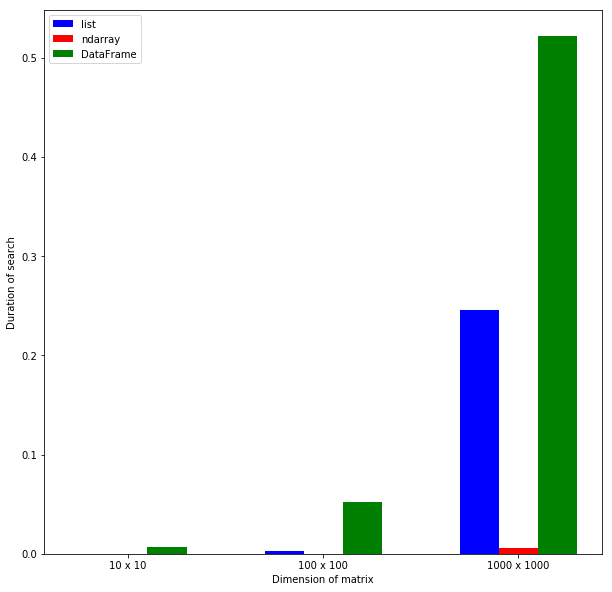





Search durations in seconds (table):


,list,ndarray,DataFrame
10 x 10,0.0000321722,0.0000221938,0.0064197538
100 x 100,0.0024819810,0.0000660684,0.0517184815
1000 x 1000,0.2454801569,0.0054223514,0.5218129067


In [4]:
linear_start = process_time()
linear_target_rows, linear_duration_mean, linear_params = search_and_return_output(dtypes, dims, num_dims_sets,\
                                                                        dims_inc_factor, "linear", num_iterations)
linear_end = process_time()
print("Total duration of assessment in seconds:")
print(linear_end - linear_start)
print("\n\n\n")

display_outout(linear_target_rows, linear_duration_mean, linear_params)

As expected, the search duration increased together with dimensions. Such phenomenon is most prominent in the list data type.

The search speed was generally fastest in ndarray and slowest in DataFrame.

This slowness in DataFrame was unexpected. I uncertainly assume that various in-built methods of DataFrame makes it slower to query.

#### 2.2.1.2. Binary search

Total duration of assessment in seconds:
323.1439919830001




Search algorithm:
binary




Data types of matrices:
['list', 'ndarray', 'DataFrame']




Number of iterations:
1000




Retrieved row per set of matrix dimensions:


,0,1,2,3,4,5,6,7,8,9
10 x 10,90,91,92,93,94,95,96,97,98,99


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
100 x 100,9900,9901,9902,9903,9904,9905,9906,9907,9908,9909,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1000 x 1000,999000,999001,999002,999003,999004,999005,999006,999007,999008,999009,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999






Search durations in seconds (plot):


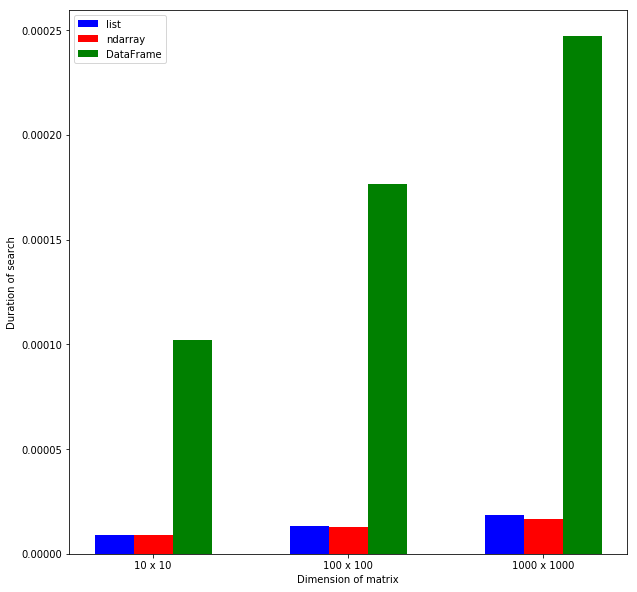





Search durations in seconds (table):


,list,ndarray,DataFrame
10 x 10,0.0000088677,0.0000088448,0.0001022627
100 x 100,0.0000132232,0.0000127776,0.0001763537
1000 x 1000,0.0000185916,0.0000167071,0.0002471493


In [5]:
binary_start = process_time()
binary_target_rows, binary_duration_mean, binary_params = search_and_return_output(dtypes, dims, num_dims_sets,\
                                                                       dims_inc_factor, "binary", num_iterations)
binary_end = process_time()
print("Total duration of assessment in seconds:")
print(binary_end - binary_start)
print("\n\n\n")

display_outout(binary_target_rows, binary_duration_mean, binary_params)

As expected, the binary search clearly outperformed the linear search.

the prominent finding is that, as seen in linear search, the binary search was much slower in DataFrame than in other data types. One cause could be all its in-built methods, but it may also be that accessing values in columns/matrix using index may be dependent on the matrix size.

#### 2.2.1.3. Visualise the speed advantage of binary searches versus linear searches

I will visualise the percentages of binary search durations compared to linear search durations. For example, the percentage will be 50% if a binary search took half the time of a linear search.

,list,ndarray,DataFrame
10 x 10,27.56313619,39.85232556,1.592937774
100 x 100,0.5327682578,19.33999124,0.3409877359
1000 x 1000,0.007573545755,0.3081150012,0.04736358642


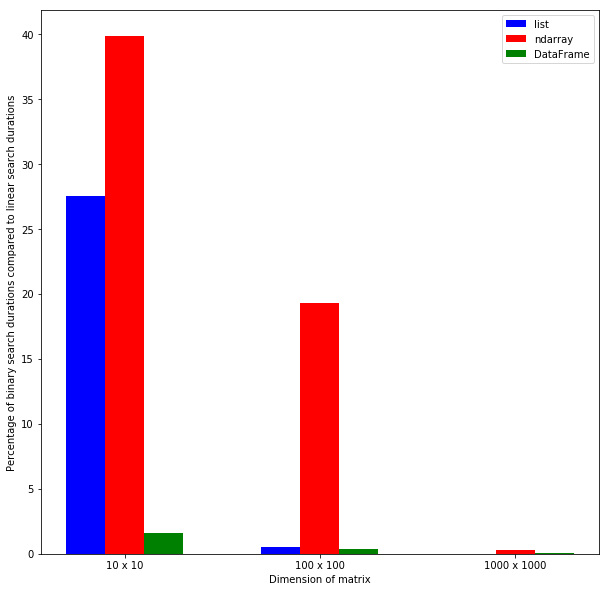

In [6]:
perc_durations = (binary_duration_mean / linear_duration_mean) * 100
display(perc_durations)
plot_search_durations(perc_durations, "Percentage of binary search durations compared to linear search durations")

Overall, the benefit of binary search grew with the matrix sizes, especially rapidly for list.



# 3. Summary

This project first discussed two matrix search strategies: binary and linear searches.

First, I explained the time complexities of each search and showed that binary search is inherently more efficient in than linear search.

Second, I implemented both searches and measured durations for different matrix sizes and data types. This demonstrated that binary searches were faster than linear searches for all data types, especially (1) with bigger matrices and (2) for list data type. Also, binary searches took much longer in DataFrame compared to ndarray and list. Such slowness is assumed to be related with DataFrame's vast amount of in-built functions and possibly the way it accesses columns/matrix using indexes.


# 4. Limitations

## 4.1. Lack of space efficiency check
Checking also the space complexity would have made this a more complete algorithmic efficiency check.

## 4.2. Impurity in search functions used in this project
Also, the accuracy of search duration measurementes were reduced due to impurity in search functions (`linear_search_matrix` and especially `binary_search_matrix`) - in addition to the search algorithm, there wre other steps required to implement the searches. The impurities may or may not dependent on the matrix sizes.

## 4.3. Time measurement vs Time complexity
Time measurement is not as robust as time complexity analysis in assessing algorithmic efficiency. For example, other processes running in the background of a computer can vary across time. This can differentially affect the performance of different algorithms. Therefore, a pure time complexity analysis would produce more generalisable results.

In this project, I tried to measure time complexity by using `process_time` function which measures [CPU time](https://en.wikipedia.org/wiki/CPU_time). The CPU time seems to represent time complexity in this case (https://cs.stackexchange.com/a/66816), but this is only a guess and should be verified.